In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# Leer la primera hoja del archivo XLSX
df_hechos = pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')


In [54]:

# Leer la segunda hoja del archivo XLSX
df_victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')



In [3]:
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [4]:
df_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [5]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [16]:
df_hechos['XY (CABA)'].isnull().sum()

0

In [43]:
print(df_hechos['TIPO_DE_CALLE'].nunique())
print(df_hechos['LUGAR_DEL_HECHO'].nunique())
print(df_hechos['COMUNA'].nunique())
print(df_hechos['VICTIMA'].nunique())
print(df_hechos['ACUSADO'].nunique())
print(df_hechos['PARTICIPANTES'].nunique())
print(df_hechos['Dirección Normalizada'].nunique())
print(df_hechos['AAAA'].nunique())
print(df_hechos['DD'].nunique())
print(df_hechos['HH'].nunique())
print(df_hechos['N_VICTIMAS'].nunique())


4
683
16
10
10
41
635
6
31
25
3


Convierto el tipo de datos de las variables con valores limitados que estaban guardados como int pero que refieren a lugares o fechas/horas de cuando ocurrio el hecho

In [3]:
df_hechos['COMUNA'] = df_hechos['COMUNA'].astype('category')
df_hechos['AAAA'] = df_hechos['AAAA'].astype('category')
df_hechos['DD'] = df_hechos['DD'].astype('category')
df_hechos['MM'] = df_hechos['MM'].astype('category')



In [15]:
df_hechos['Altura'] = df_hechos['Altura'].astype('category')

In [6]:
df_hechos[df_hechos.duplicated()]-


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


Por el primer analisis de los datos se puede ver qeu no hay valores duplicados que se refieran a direcciones o valores de identeficacion de los casos. La direccion de lso hechos esta completa en todos los registros, los valores flatantes en la columna 'direccion normalizada' pueden ignorarse al ser pocos y al tener esa infomacion ede todas formas tanto en la columna 'LUGAR DEL HECHO' y en la l localizacion exacta de longitud y latitud.

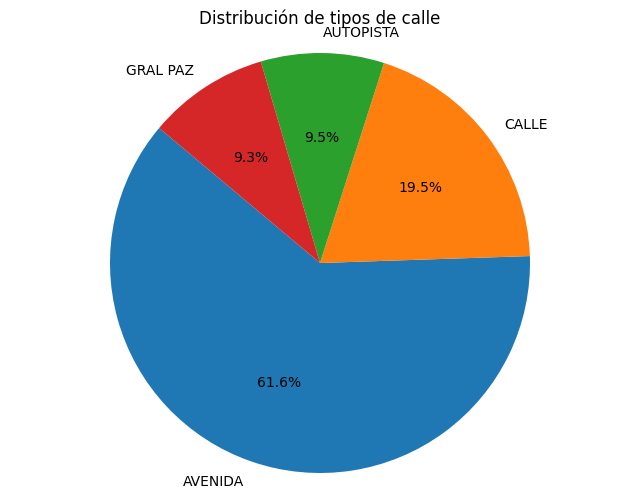

In [10]:
conteo_tipos_calle = df_hechos['TIPO_DE_CALLE'].value_counts()

# Preparar datos para el gráfico de torta
labels = conteo_tipos_calle.index
sizes = conteo_tipos_calle.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de tipos de calle')
plt.axis('equal')
plt.show()

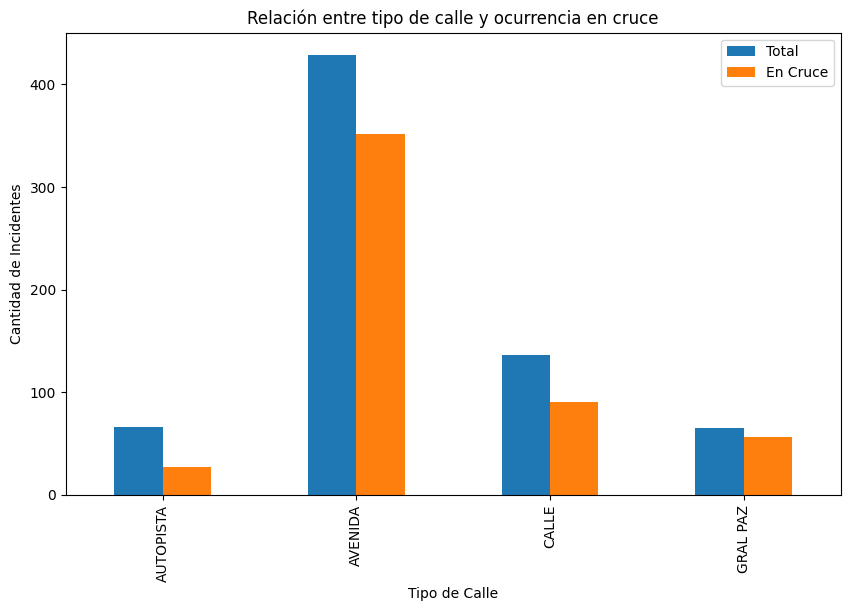

In [11]:
conteo_tipos_calle = df_hechos['TIPO_DE_CALLE'].value_counts()

# Contar la cantidad de incidentes que ocurren en un cruce por tipo de calle
incidentes_en_cruce = df_hechos[df_hechos['Cruce'].notnull()]['TIPO_DE_CALLE'].value_counts()

# Combinar ambas series en un DataFrame para tener la información en un solo lugar
relacion_calle_cruce = pd.DataFrame({'Total': conteo_tipos_calle, 'En Cruce': incidentes_en_cruce})
relacion_calle_cruce.fillna(0, inplace=True)  # Rellenar NaN con 0 para aquellos tipos de calle sin incidentes en cruces

# Graficar la relación entre tipo de calle y si ocurren en un cruce o no
relacion_calle_cruce.plot(kind='bar', figsize=(10, 6))
plt.title('Relación entre tipo de calle y ocurrencia en cruce')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Incidentes')
plt.legend()
plt.show()

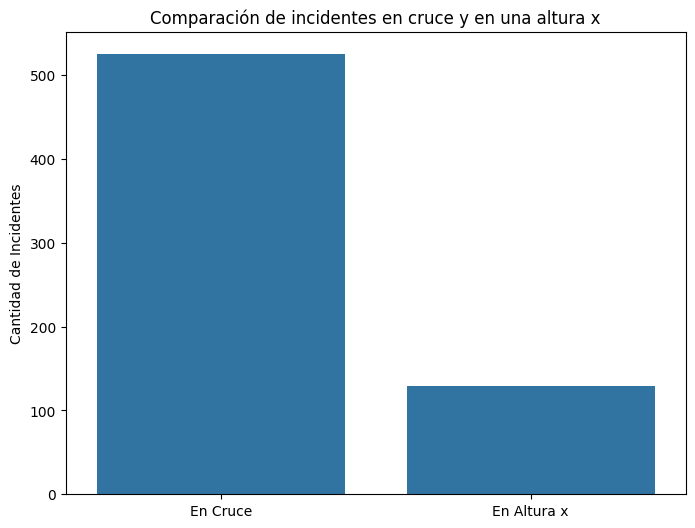

In [18]:
incidentes_en_cruce = df_hechos['Cruce'].notnull().sum()
incidentes_en_altura = df_hechos['Altura'].notnull().sum()

# Graficar la cantidad de incidentes en cruce y en una dirección (altura)
categorias = ['En Cruce', 'En Altura x']
cantidad_incidentes = [incidentes_en_cruce, incidentes_en_altura]

plt.figure(figsize=(8, 6))
sns.barplot(x=categorias, y=cantidad_incidentes)
plt.ylabel('Cantidad de Incidentes')
plt.title('Comparación de incidentes en cruce y en una altura x')
plt.show()

La mayor cantidad de accidentes ocurre en cruces de calles principalmente avenidas, lo qeu explica la falta de valores en la columna de altura, ya que corresponden a los casos en lso qeu no se da en cruces. Estos valores faltanrtes se relaciona conla naturaleza de la direccion del hecho. La actura es relevante cuando no se trata de un cruce de calles 

In [24]:
df_hechos['Cruce'].value_counts()

Cruce
PAZ, GRAL. AV.              14
ESCALADA AV.                 9
RIVADAVIA AV.                8
INDEPENDENCIA AV.            7
BALBIN, RICARDO, DR. AV.     6
                            ..
LA RIOJA                     1
TRAFUL                       1
HUMAITA                      1
MANZANARES                   1
HUGO, VICTOR                 1
Name: count, Length: 317, dtype: int64

In [25]:
df_hechos[df_hechos['Cruce'] == 'PAZ, GRAL. AV.']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
40,2016-0054,1,2016-04-23,2016,4,23,21:00:00,21,AU LUIS DELLEPIANE Y AV GRAL PAZ,AUTOPISTA,...,NaN,"PAZ, GRAL. AV.","AUTOPISTA DELLEPIANE LUIS TTE. GRAL. y PAZ, GR...",8,Point (97832.57143731 93489.83736533),-58.48695354,-34.68795245,MOTO-MOTO,MOTO,MOTO
74,2016-0099,1,2016-07-29,2016,7,29,16:00:00,16,AV GRAL MOSCONI Y AV GRAL PAZ,GRAL PAZ,...,NaN,"PAZ, GRAL. AV.","MOSCONI GENERAL AV. y PAZ, GRAL. AV.",11,Point (94486.28631712 103468.59928582),-58.52340614,-34.59798754,CARGAS-CARGAS,CARGAS,CARGAS
215,2017-0090,1,2017-07-15,2017,7,15,05:15:00,5,AV. CHIVILCOY Y COLECTORA AV. GRAL. PAZ,GRAL PAZ,...,NaN,"PAZ, GRAL. AV.","CHIVILCOY AV. y PAZ, GRAL. AV.",11,Point (94866.55993974 104164.40879727),-58.51925642,-34.59171721,PEATON-AUTO,PEATON,AUTO
216,2017-0091,1,2017-07-15,2017,7,15,13:00:00,13,SUPERI Y AV. GRAL. PAZ,GRAL PAZ,...,NaN,"PAZ, GRAL. AV.","SUPERI y PAZ, GRAL. AV.",12,Point (97850.57417090 109546.39428377),-58.48671535,-34.54321216,MOTO-SD,MOTO,SD
259,2017-0144,1,2017-11-26,2017,11,26,06:45:00,6,AV. CNEL. ROCA Y COLECTORA AV. GRAL. PAZ,GRAL PAZ,...,NaN,"PAZ, GRAL. AV.","ROCA, CNEL. AV. y PAZ, GRAL. AV.",8,Point (99327.01838497 92326.91130631),-58.47064556,-34.69843756,AUTO-OBJETO FIJO,AUTO,OBJETO FIJO
271,2017-0158,1,2017-12-18,2017,12,18,21:30:00,21,GUALEGUAYCHU Y COLECTORA AV. GRAL PAZ,GRAL PAZ,...,NaN,"PAZ, GRAL. AV.","GUALEGUAYCHU y PAZ, GRAL. AV.",11,Point (94764.11350214 103903.32150283),-58.52037476,-34.59407024,MOTO-AUTO,MOTO,AUTO
350,2018-0076,1,2018-07-16,2018,7,16,09:30:00,9,"Chavez, Jorge y Paz, Gral. Av.",CALLE,...,NaN,"PAZ, GRAL. AV.","CHAVEZ, JORGE y PAZ, GRAL. AV.",9,Point (93946.81673714 97681.68907836),-58.52932872,-34.65014993,AUTO-CARGAS,AUTO,CARGAS
353,2018-0079,1,2018-07-23,2018,7,23,07:15:00,7,"De Los Corrales Av. y Paz, Gral. Av.",GRAL PAZ,...,NaN,"PAZ, GRAL. AV.","DE LOS CORRALES AV. y PAZ, GRAL. AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,PEATON-CARGAS,PEATON,CARGAS
389,2018-0115,1,2018-10-31,2018,10,31,12:30:00,12,"Bosch, Ventura y Paz, Gral. Av.",CALLE,...,NaN,"PAZ, GRAL. AV.","BOSCH, VENTURA y PAZ, GRAL. AV.",9,Point (93987.63954589 98477.26093452),-58.52887773,-34.64297861,PEATON-PASAJEROS,PEATON,PASAJEROS
443,2019-0026,1,2019-03-28,2019,3,28,07:32:00,7,"FERNANDEZ DE LA CRUZ, F. , GRAL. AV. Y LARRAZABAL",AVENIDA,...,NaN,"PAZ, GRAL. AV.","FERNANDEZ DE LA CRUZ, F., GRAL. AV. y PAZ, GRA...",8,Point (98491.08733048 93092.87943671),-58.47976785,-34.69153196,PEATON-PASAJEROS,PEATON,PASAJEROS


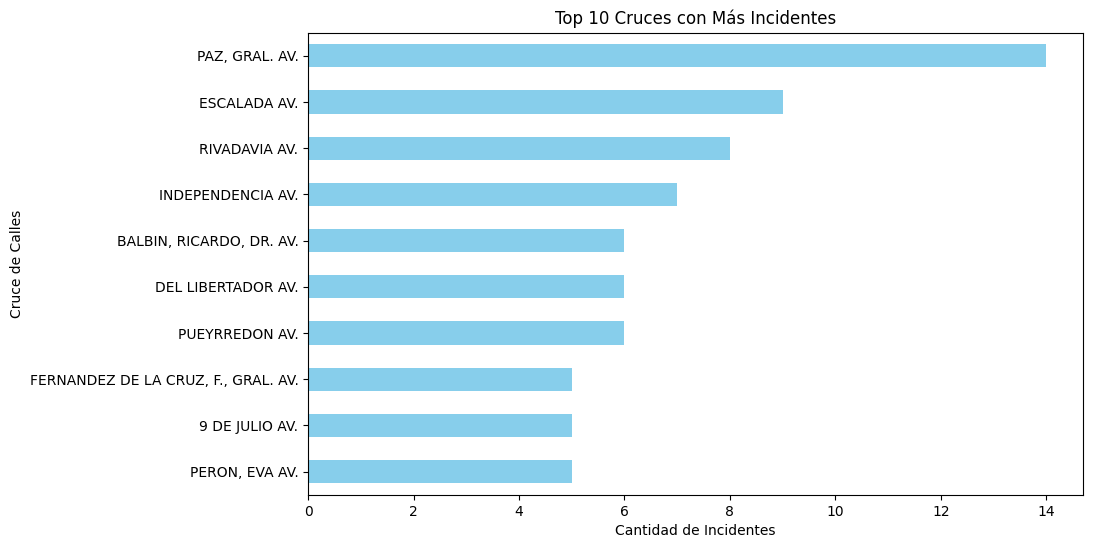

In [32]:
cruces_frecuentes = df_hechos['Cruce'].value_counts().head(10)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
cruces_frecuentes.plot(kind='barh', color='skyblue')
plt.title('Top 10 Cruces con Más Incidentes')
plt.xlabel('Cantidad de Incidentes')
plt.ylabel('Cruce de Calles')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el más frecuente arriba
plt.show()

a PARTIR DE ESTA PRIEMRA PARTE DEL ANALISI SE PEUDE VER QUE LA mayor parte de los accidentes ocurren en avenidas siendo ramas principales , y los cruces de otras calles con estas vias. 

In [16]:
df_hechos.describe()

,N_VICTIMAS,FECHA
count,696.000000,696
mean,1.030172,2018-09-14 05:12:24.827586048
min,1.000000,2016-01-01 00:00:00
25%,1.000000,2017-04-02 12:00:00
50%,1.000000,2018-07-12 12:00:00
75%,1.000000,2020-01-04 06:00:00
max,3.000000,2021-12-30 00:00:00
std,0.179393,NaN


In [51]:
df_hechos['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    676
2     19
3      1
Name: count, dtype: int64

<Axes: xlabel='N_VICTIMAS', ylabel='Count'>

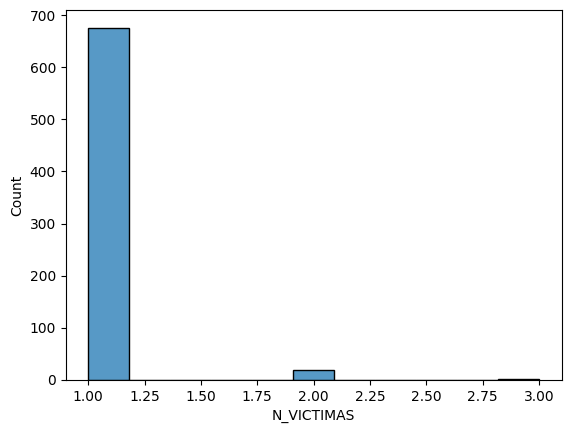

In [52]:
sns.histplot(data=df_hechos, x='N_VICTIMAS')

La mayoria de los accidentes tuvieron una sola victima

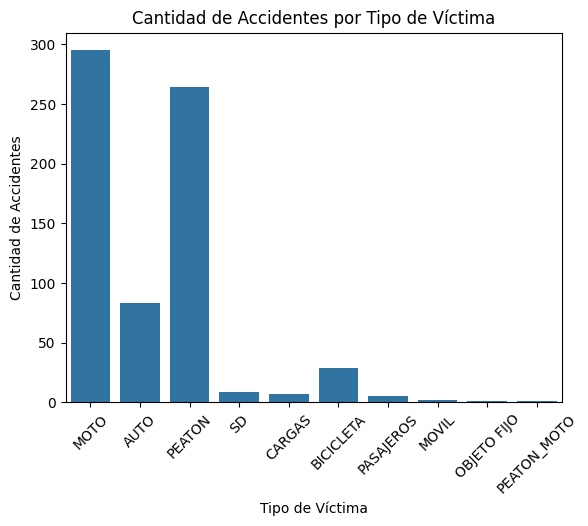

In [57]:
sns.countplot(data=df_hechos, x='VICTIMA')
plt.title('Cantidad de Accidentes por Tipo de Víctima')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

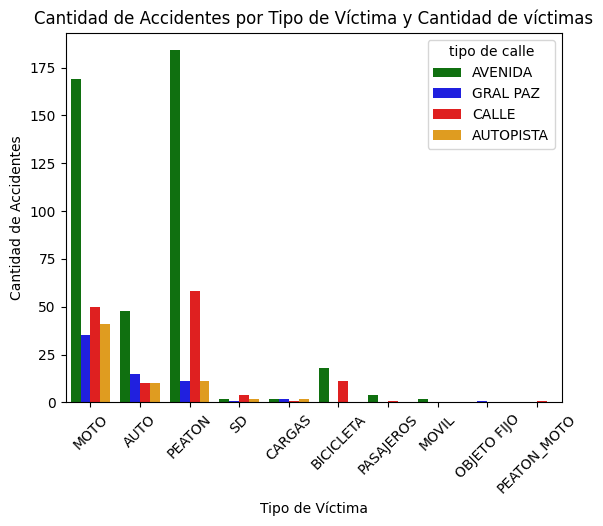

In [71]:
sns.countplot(data=df_hechos, x='VICTIMA', hue='TIPO_DE_CALLE', palette=['green', 'blue', 'red', 'orange'])
plt.title('Cantidad de Accidentes por Tipo de Víctima y Cantidad de víctimas')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad de Accidentes')
plt.legend(title='tipo de calle')
plt.xticks(rotation=45)
plt.show()

La mayoria de los accidentes tiene una sola victima, siendo principalmte peatones y motocicletas en avenidas, como se vio anteriormenet

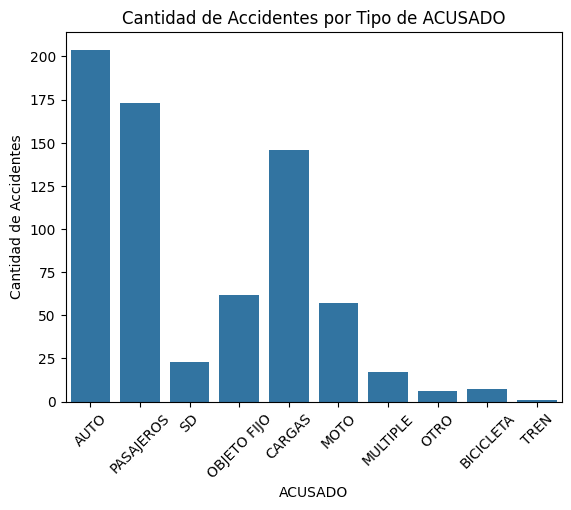

In [5]:
sns.countplot(data=df_hechos, x='ACUSADO')
plt.title('Cantidad de Accidentes por Tipo de ACUSADO')
plt.xlabel('ACUSADO')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

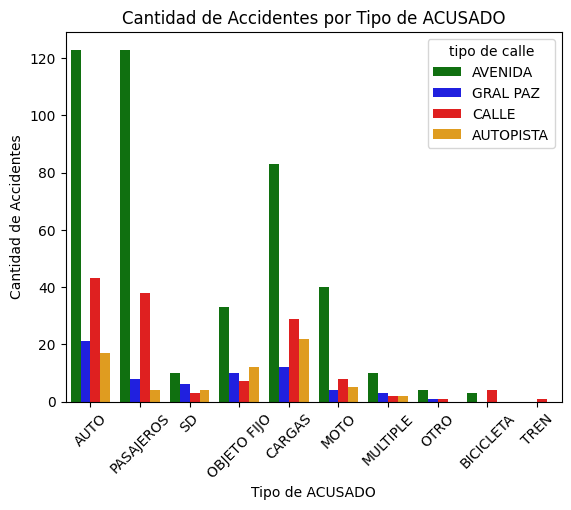

In [15]:
sns.countplot(data=df_hechos, x='ACUSADO', hue='TIPO_DE_CALLE', palette=['green', 'blue', 'red', 'orange'])
plt.title('Cantidad de Accidentes por Tipo de ACUSADO')
plt.xlabel('Tipo de ACUSADO')
plt.ylabel('Cantidad de Accidentes')
plt.legend(title='tipo de calle')
plt.xticks(rotation=45)
plt.show()

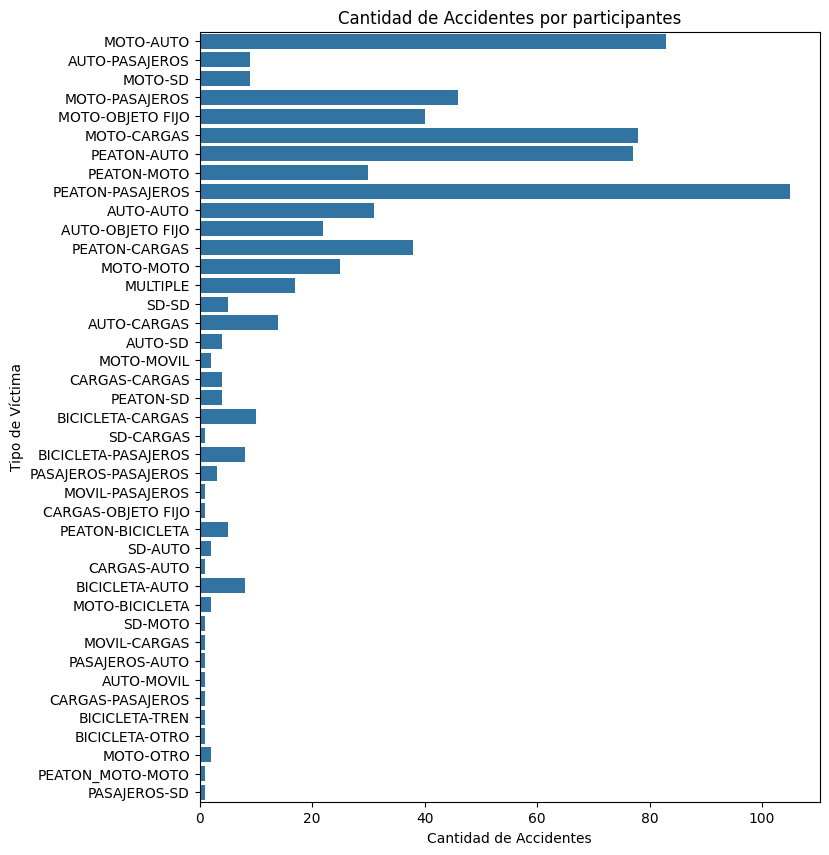

In [14]:
plt.figure(figsize=(8, 10))  # Ajusta el tamaño del gráfico a tus preferencias
sns.countplot(data=df_hechos, y='PARTICIPANTES')
plt.title('Cantidad de Accidentes por participantes afectados')
plt.ylabel('Tipo de Víctima')
plt.xlabel('Cantidad de Accidentes')
plt.show()


Se puede ver qeu los principales implicaodos en los accidentes son motos y peatones como vitimas y siendo autos los considerados acusados/causantes del accidente

CANTIDAD PROMEDIO DE ACCIDENTES POR MES Y POR AÑO

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1476\2568092215.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incidentes_por_anio = df_hechos.groupby('AAAA').size()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1476\2568092215.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incidentes_por_mes = df_hechos.groupby('MM').size()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1476\2568092215.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

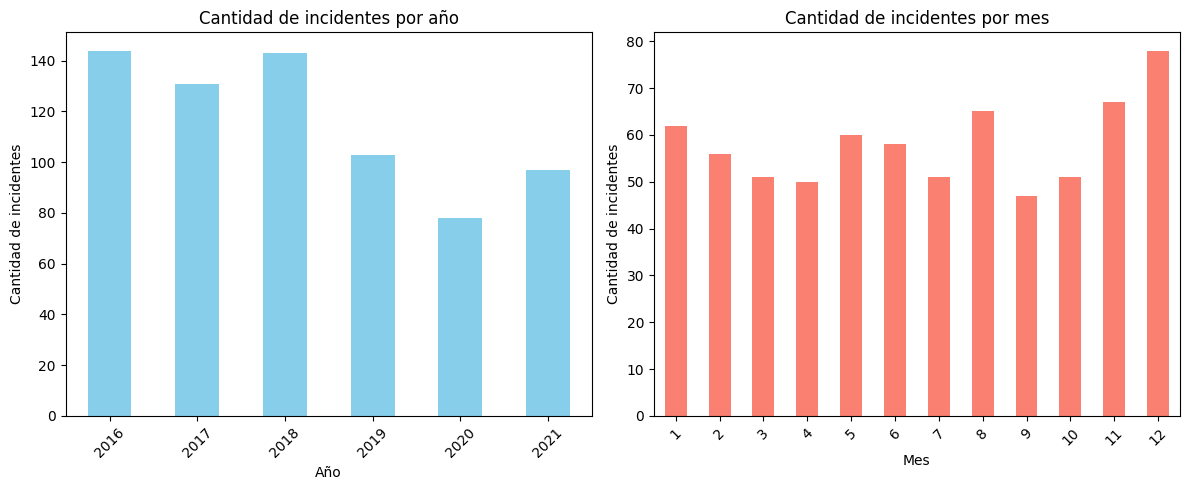

Promedio de incidentes por año: 116.0
Promedio de incidentes por mes para cada año:
AAAA
2016    12.000000
2017    10.916667
2018    11.916667
2019     8.583333
2020     6.500000
2021     8.083333
dtype: float64


In [30]:

# Contar la cantidad de incidentes por año y por mes
incidentes_por_anio = df_hechos.groupby('AAAA').size()
incidentes_por_mes = df_hechos.groupby('MM').size()

# Calcular el promedio de incidentes por año
promedio_por_anio = df_hechos.groupby('AAAA').size().mean()

# Calcular el promedio de incidentes por mes para cada año
promedio_por_mes_por_anio = df_hechos.groupby(['AAAA', 'MM']).size().groupby('AAAA').mean()

# Graficar la cantidad de incidentes por año y por mes
plt.figure(figsize=(12, 5))

# Gráfico por año
plt.subplot(1, 2, 1)
promedio_por_anio.plot(kind='bar', color='skyblue')
plt.title('Cantidad promedio de incidentes por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de incidentes')
plt.xticks(rotation=45)

# Gráfico por mes
plt.subplot(1, 2, 2)
promedio_por_mes_por_anio.plot(kind='bar', color='salmon')
plt.title('Cantidad de promedio incidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de incidentes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Imprimir promedios
print(f"Promedio de incidentes por año: {promedio_por_anio}")
print("Promedio de incidentes por mes para cada año:")
print(promedio_por_mes_por_anio)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1476\1140439344.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incidentes_por_mes_por_anio = df_hechos.groupby(['AAAA', 'MM']).size().unstack()


Promedio de accidentes por mes:
MM
1     10.333333
2      9.333333
3      8.500000
4      8.333333
5     10.000000
6      9.666667
7      8.500000
8     10.833333
9      7.833333
10     8.500000
11    11.166667
12    13.000000
dtype: float64


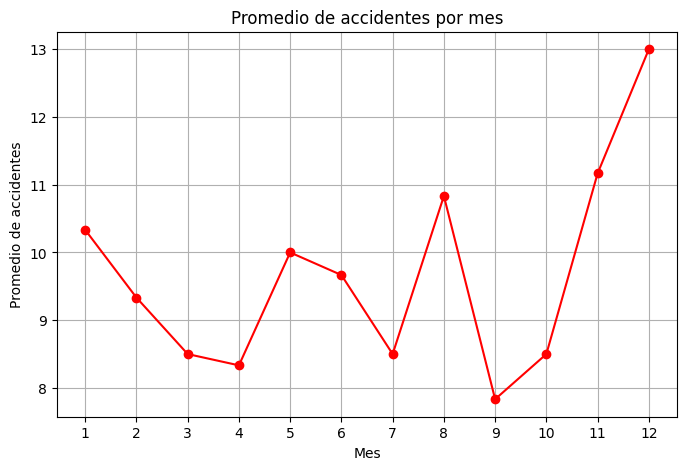

In [33]:

# Calcular el promedio de accidentes por mes considerando todos los años
incidentes_por_mes_por_anio = df_hechos.groupby(['AAAA', 'MM']).size().unstack()

promedio_por_mes = incidentes_por_mes_por_anio.mean()

print("Promedio de accidentes por mes:")
print(promedio_por_mes)

plt.figure(figsize=(8, 5))
plt.plot(promedio_por_mes.index, promedio_por_mes.values, marker='o', linestyle='-', color='red')
plt.title('Promedio de accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de accidentes')
plt.xticks(promedio_por_mes.index)
plt.grid(True)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1476\1611211648.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incidentes_por_mes_por_anio = df_hechos.groupby(['AAAA', 'MM']).size().unstack()


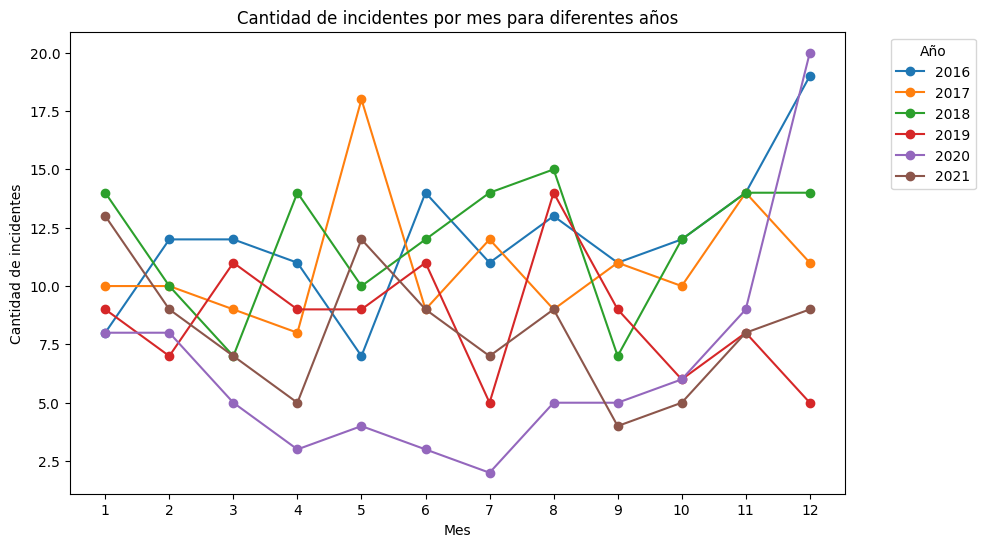

In [27]:
# HACER ESTO EN UN GRAFICO SEP PARA CADA UNO
incidentes_por_mes_por_anio = df_hechos.groupby(['AAAA', 'MM']).size().unstack()

# Graficar la cantidad de incidentes por mes para varios años con un gráfico de líneas
plt.figure(figsize=(10, 6))

for year in incidentes_por_mes_por_anio.index:
    plt.plot(incidentes_por_mes_por_anio.columns, incidentes_por_mes_por_anio.loc[year], marker='o', label=year)

plt.title('Cantidad de incidentes por mes para diferentes años')
plt.xlabel('Mes')
plt.ylabel('Cantidad de incidentes')
plt.xticks(incidentes_por_mes_por_anio.columns)
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

hay relacion entre el horario y los accidentes? horario mas peligroso

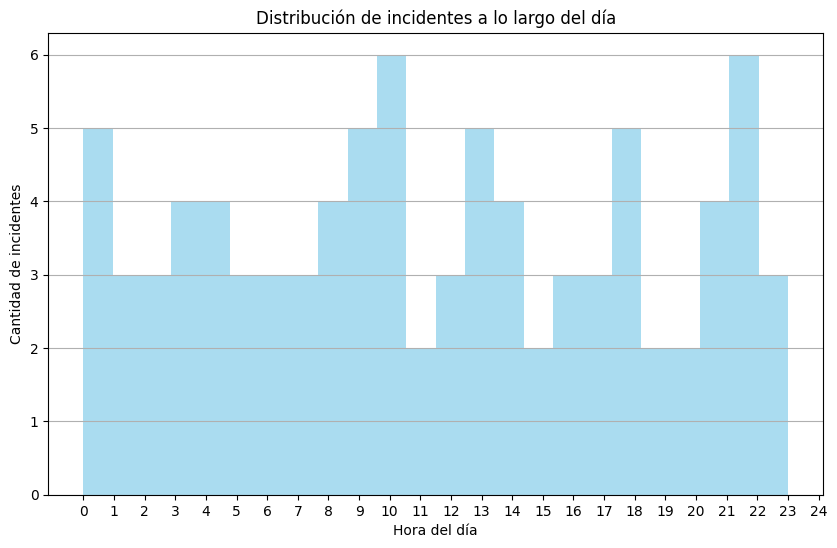

In [19]:
df_hechos['HORA'] = pd.to_datetime(df_hechos['HORA'], errors='coerce')

# Eliminar filas con valores de hora no válidos (por ejemplo, NaN después de la conversión)
df_hechos = df_hechos.dropna(subset=['HORA'])

# Graficar la distribución de incidentes a lo largo del día
plt.figure(figsize=(10, 6))
df_hechos['HORA'].dt.hour.hist(bins=24, color='skyblue', alpha=0.7)
plt.title('Distribución de incidentes a lo largo del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de incidentes')
plt.xticks(range(0, 25))  # Establecer las marcas del eje x para representar las 24 horas
plt.grid(axis='x')
plt.show()

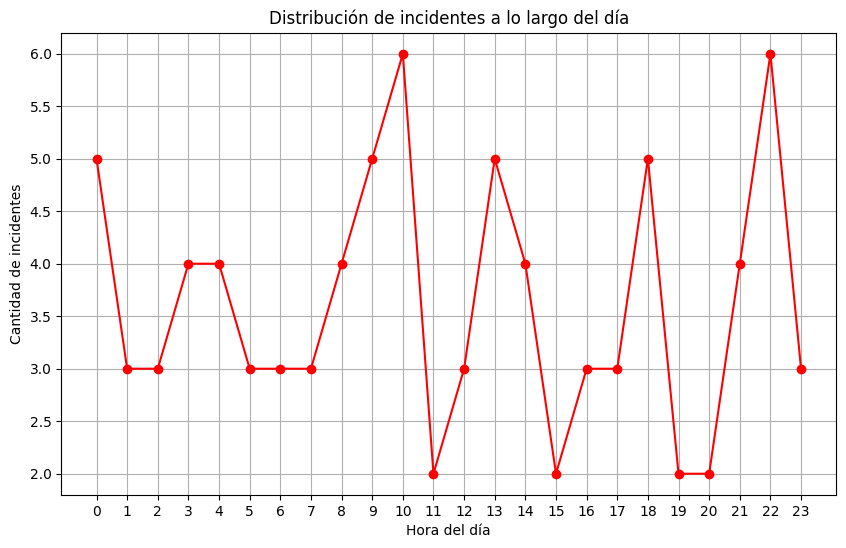

In [22]:


df_hechos['HORA'] = pd.to_datetime(df_hechos['HORA'], errors='coerce')
df_hechos = df_hechos.dropna(subset=['HORA'])

# Obtener la cantidad de incidentes por hora
incidentes_por_hora = df_hechos['HORA'].dt.hour.value_counts().sort_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(incidentes_por_hora.index, incidentes_por_hora.values, marker='o', linestyle='-', color='red')
plt.title('Distribución de incidentes a lo largo del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de incidentes')
plt.xticks(range(0, 24))  # Establecer las marcas del eje x para representar las 24 horas
plt.grid(True)
plt.show()

Los horarios picos son de lunes a viernes en ambos sentidos de 07:00 a 11:00 y de 16:00 a 20:00

In [9]:
conteo_por_comuna=df_hechos['COMUNA'].value_counts()
print(conteo_por_comuna)

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64


In [5]:
df_hechos[df_hechos['COMUNA'] == 0]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD


In [6]:
df_hechos[df_hechos['LUGAR_DEL_HECHO'] == 'AUTOPISTA 25 DE MAYO']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD


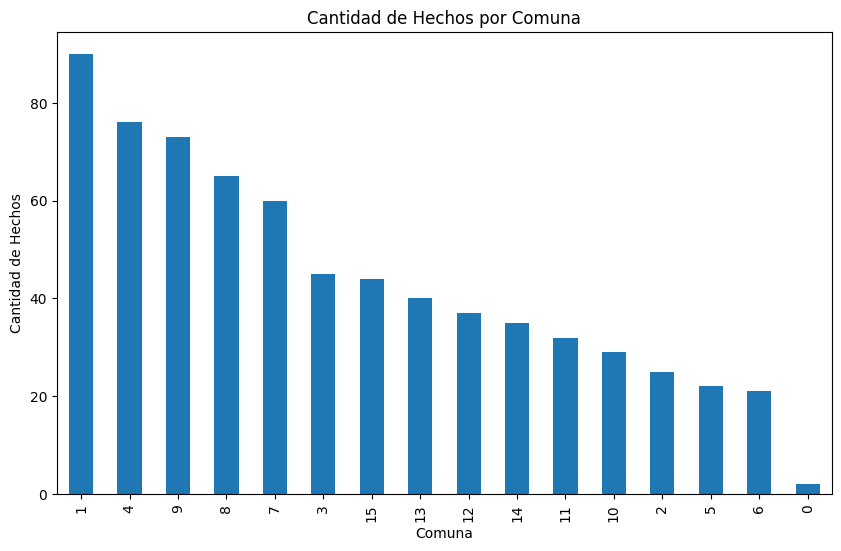

In [10]:
conteo_por_comuna.plot(kind='bar', figsize=(10, 6))
plt.title('Cantidad de Hechos por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Hechos')
plt.show()

In [12]:
total_hechos = conteo_por_comuna.sum()

# Calculando el porcentaje que representa cada comuna
porcentaje_por_comuna = (conteo_por_comuna / total_hechos) * 100

print(porcentaje_por_comuna)
print(total_hechos)

COMUNA
1     12.931034
4     10.919540
9     10.488506
8      9.339080
7      8.620690
3      6.465517
15     6.321839
13     5.747126
12     5.316092
14     5.028736
11     4.597701
10     4.166667
2      3.591954
5      3.160920
6      3.017241
0      0.287356
Name: count, dtype: float64
696


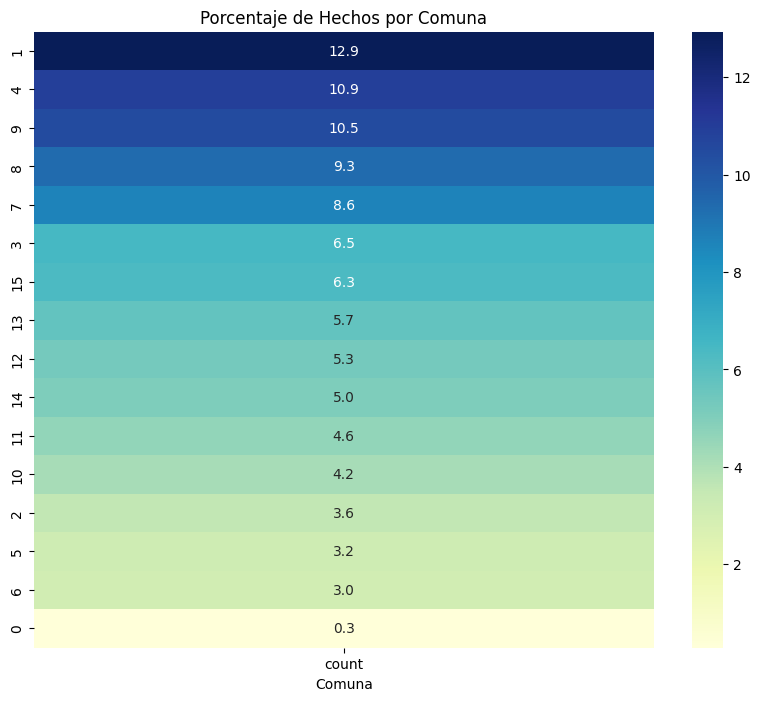

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(porcentaje_por_comuna.to_frame(), annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Porcentaje de Hechos por Comuna')
plt.xlabel('Comuna')
plt.ylabel('')  # Para ocultar el nombre del eje y
plt.show()

In [29]:

conteo_por_comuna = {}

# Iterar sobre cada comuna (supongamos que van de 0 a 14)
for comuna in range(15):
    # Filtrar el DataFrame por cada comuna
    hechos_comuna = df_hechos[df_hechos['COMUNA'] == comuna]
    
    # Contar los hechos por año en la comuna actual
    conteo_por_año = hechos_comuna['AAAA'].value_counts()
    
    # Almacenar los conteos por año en el diccionario para la comuna actual
    conteo_por_comuna[f'Comuna_{comuna}'] = conteo_por_año

# Mostrar los conteos por año para cada comuna
for comuna, conteo_año in conteo_por_comuna.items():
    print(f"Comuna {comuna}:")
    print(conteo_año)
    print("-----------------------")


Comuna Comuna_0:
AAAA
2016    2
Name: count, dtype: int64
-----------------------
Comuna Comuna_1:
AAAA
2016    22
2018    19
2017    18
2019    12
2020    10
2021     9
Name: count, dtype: int64
-----------------------
Comuna Comuna_2:
AAAA
2018    7
2017    6
2020    5
2021    4
2019    2
2016    1
Name: count, dtype: int64
-----------------------
Comuna Comuna_3:
AAAA
2018    11
2020    10
2016     8
2021     8
2017     6
2019     2
Name: count, dtype: int64
-----------------------
Comuna Comuna_4:
AAAA
2016    16
2017    16
2018    15
2021    13
2019    12
2020     4
Name: count, dtype: int64
-----------------------
Comuna Comuna_5:
AAAA
2019    5
2018    4
2021    4
2016    3
2017    3
2020    3
Name: count, dtype: int64
-----------------------
Comuna Comuna_6:
AAAA
2017    6
2021    5
2016    3
2018    3
2019    2
2020    2
Name: count, dtype: int64
-----------------------
Comuna Comuna_7:
AAAA
2018    16
2017    11
2019    11
2016    10
2020     6
2021     6
Name: count, dtype: 

MOSTRAR LA COMUNA CON MAS ACCIDETTES EL ULTIMO AÑO, GRAFICO  CON LA CANTIDAD DE ACCIDENTES POR COMUNA EN EL UTIMO AÑO O POR AÑO - OSEA UN GRAFICO POR AÑO CON LAS 15 COMUNAS , OSEA 5 GRAFIC

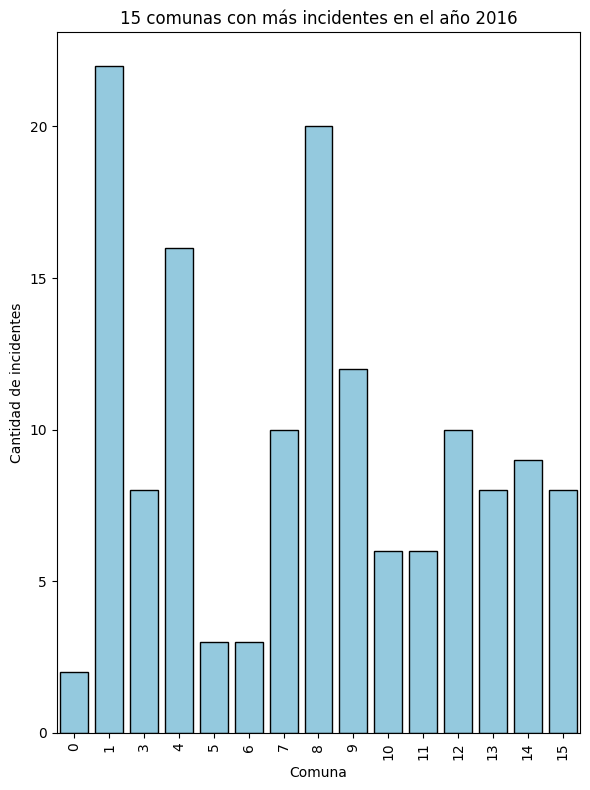

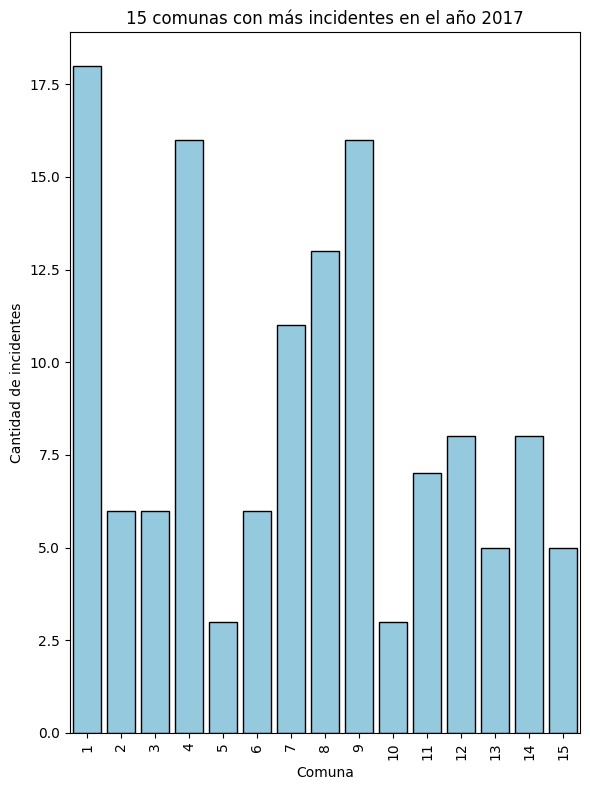

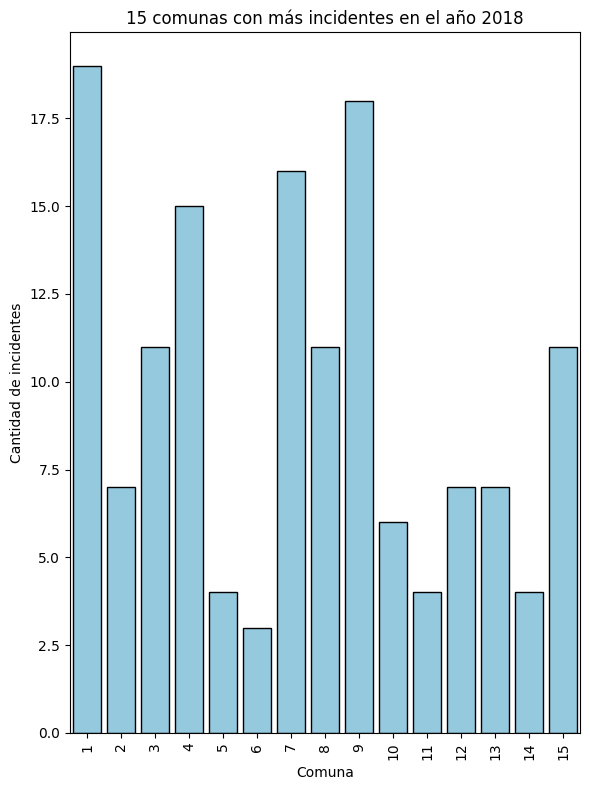

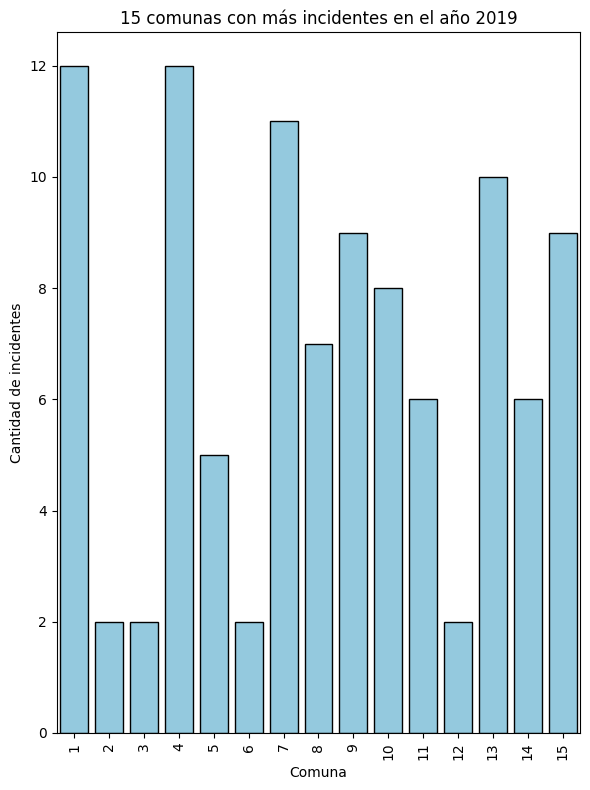

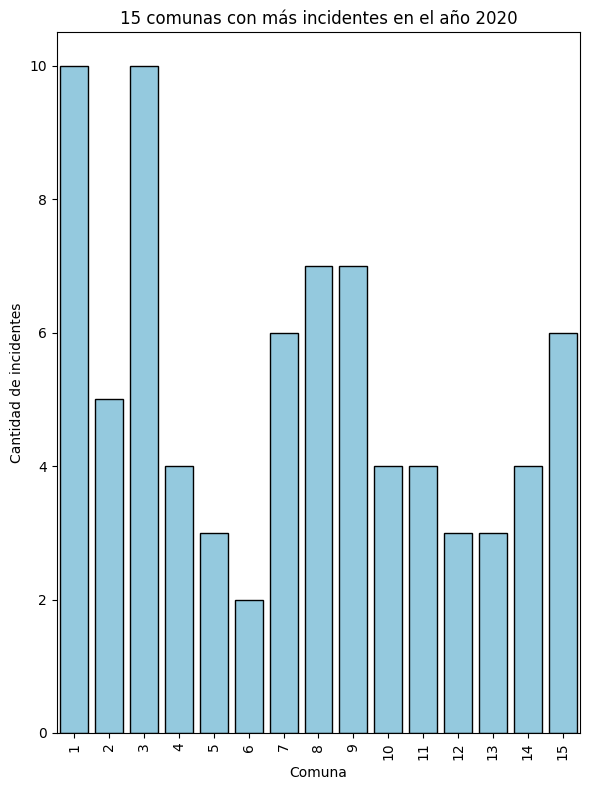

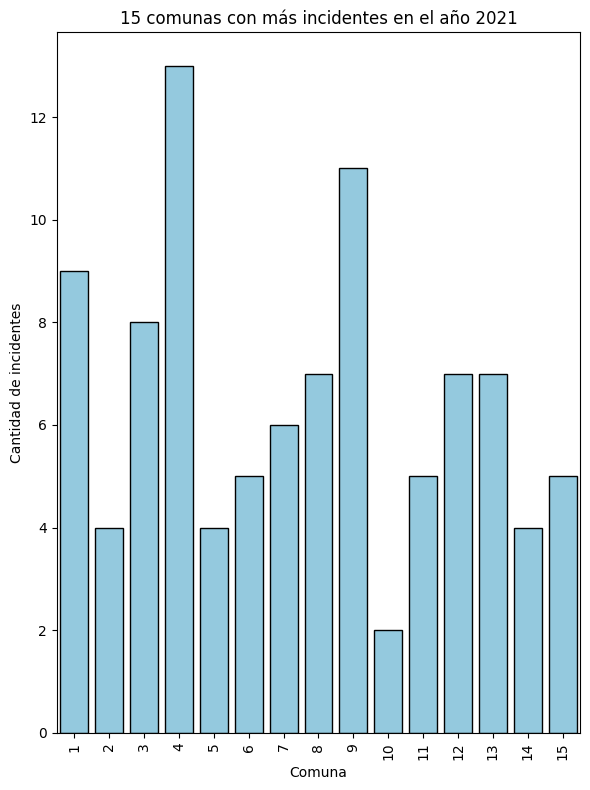

In [14]:
COMUNA_ANIO = df_hechos.groupby(['AAAA', 'COMUNA']).size().reset_index(name='Cantidad')

# Obtener la lista de años únicos en tus datos
lista_anios = COMUNA_ANIO['AAAA'].unique()

# Iterar sobre cada año para crear gráficos separados
for anio in lista_anios:
    datos_anio_actual = COMUNA_ANIO[COMUNA_ANIO['AAAA'] == anio].nlargest(15, 'Cantidad')

    plt.figure(figsize=(6, 8))
    sns.barplot(data=datos_anio_actual, x='COMUNA', y='Cantidad', color='skyblue', edgecolor='black')
    plt.title(f'15 comunas con más incidentes en el año {anio}')
    plt.xlabel('Comuna')
    plt.ylabel('Cantidad de incidentes')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [15]:
pivot_table = COMUNA_ANIO.pivot(index='COMUNA', columns='AAAA', values='Cantidad').fillna(0)

# Calcular la matriz de correlación
correlation_matrix = pivot_table.corr()

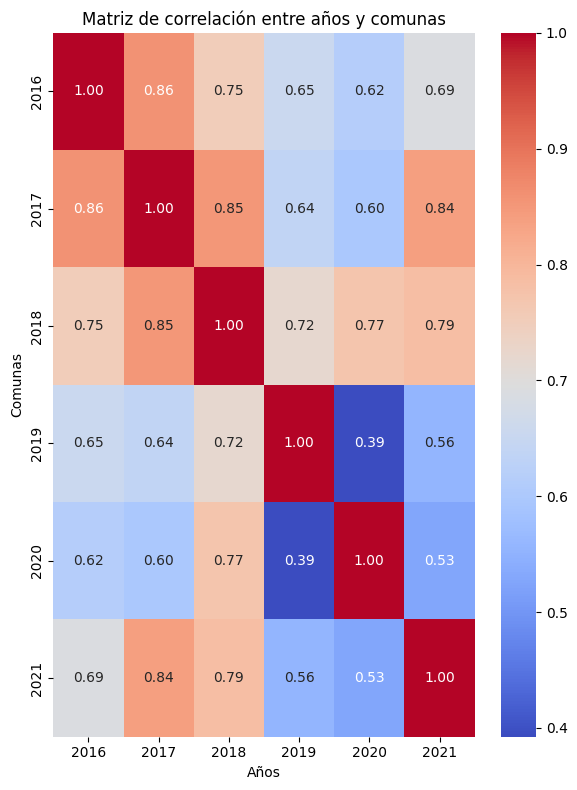

In [17]:
plt.figure(figsize=(6, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre años y comunas')
plt.xlabel('Años')
plt.ylabel('Comunas')
plt.tight_layout()
plt.show()


Segun el total de los registros en la zoa de la comuna 1 s concetran la mayor cantidad de accidentes pero disminuyen en los ultimos años

DF VICTIMAS

In [30]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [40]:
print(df_victimas['FECHA'].nunique())
print(df_victimas['ID_hecho'].nunique())
print(df_victimas['SEXO'].nunique())


598
696
3


In [43]:

df_victimas['AAAA'] = df_victimas['AAAA'].astype('category')
df_victimas['DD'] = df_victimas['DD'].astype('category')
df_victimas['MM'] = df_victimas['MM'].astype('category')



In [56]:
df_victimas['EDAD'] = pd.to_numeric(df_victimas['EDAD'], errors='coerce')


edad de la vitima, edad promedio, edad de la mayoria, ouliders

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7948\957271172.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_victimas['EDAD'].dropna(), shade=True, color='red')


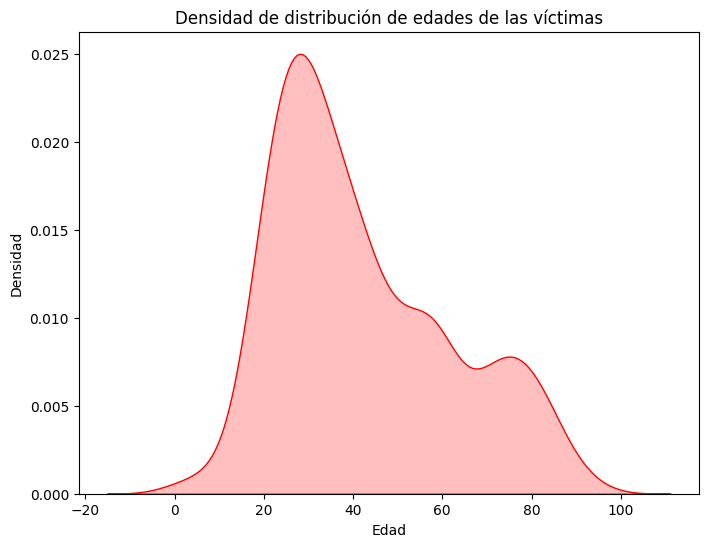

In [51]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df_victimas['EDAD'].dropna(), shade=True, color='red')
plt.title('Densidad de distribución de edades de las víctimas')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()


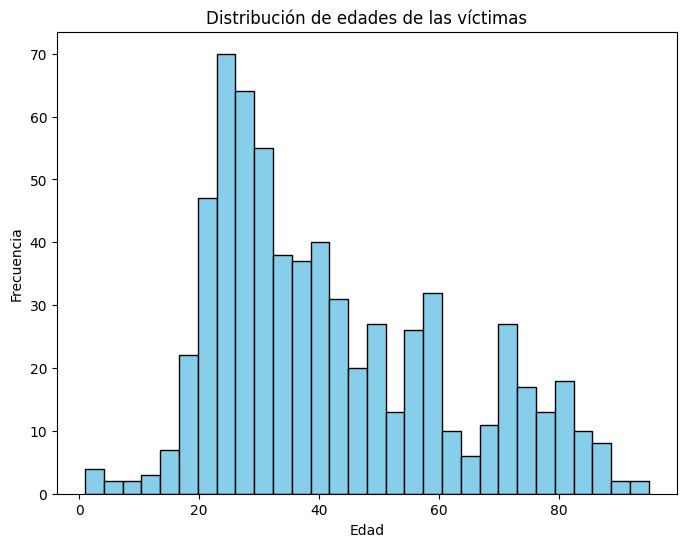

In [52]:
plt.figure(figsize=(8, 6))
plt.hist(df_victimas['EDAD'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de edades de las víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


relacion de victimas, genero

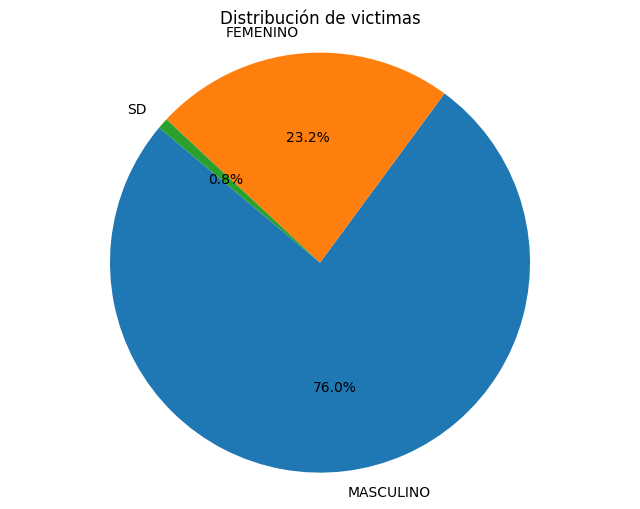

In [25]:
conteo_tipos_calle = df_victimas['SEXO'].value_counts()

# Preparar datos para el gráfico de torta
labels = conteo_tipos_calle.index
sizes = conteo_tipos_calle.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de victimas')
plt.axis('equal')
plt.show()

facecimiento, en el acto

In [63]:
cantidad_sd = (df_victimas['FECHA_FALLECIMIENTO'] == 'SD').sum()
print(f"Cantidad de 'SD' en la columna de fechas: {cantidad_sd}")



Cantidad de 'SD' en la columna de fechas: 68


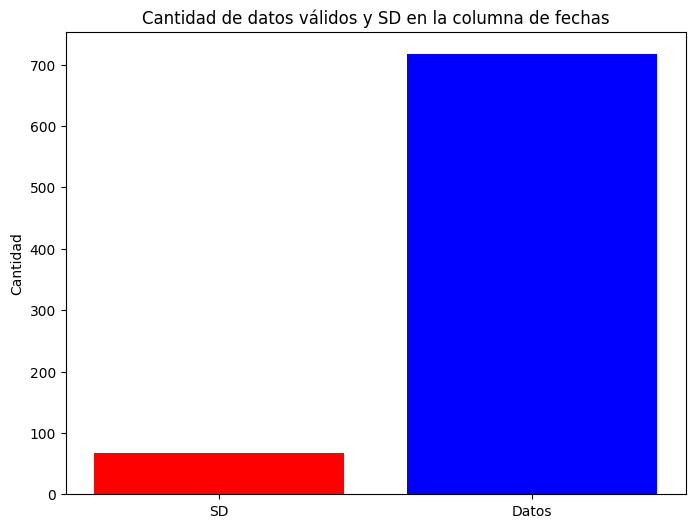

In [65]:
cantidad_sd = (df_victimas['FECHA_FALLECIMIENTO'] == 'SD').sum()
cantidad_no_nulos = df_victimas['FECHA_FALLECIMIENTO'].notnull().sum()

# Crear un gráfico de barras
labels = ['SD', 'Datos']
cantidad_datos = [cantidad_sd, cantidad_no_nulos]

plt.figure(figsize=(8, 6))
plt.bar(labels, cantidad_datos, color=['red', 'blue'])
plt.title('Cantidad de datos válidos y SD en la columna de fechas')
plt.ylabel('Cantidad')
plt.show()

In [68]:
# Convertir la columna 'Fecha_Salida_Hospital' a datetime
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')

# Verificar que se haya realizado la conversión correctamente
print(df_victimas['FECHA_FALLECIMIENTO'].dtype)

# Ahora, puedes proceder a calcular la diferencia entre las fechas
# Suponiendo que la columna 'Fecha_Ocurrido' ya está en formato datetime64[ns]
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'])

# Calcular la diferencia entre las fechas
diferencia_fechas = df_victimas['FECHA_FALLECIMIENTO'] - df_victimas['FECHA']

# Mostrar la diferencia de fechas en días
print(diferencia_fechas)


datetime64[ns]
0      0 days
1      0 days
2      0 days
3         NaT
4     11 days
        ...  
712    0 days
713    5 days
714    0 days
715    3 days
716    5 days
Length: 717, dtype: timedelta64[ns]


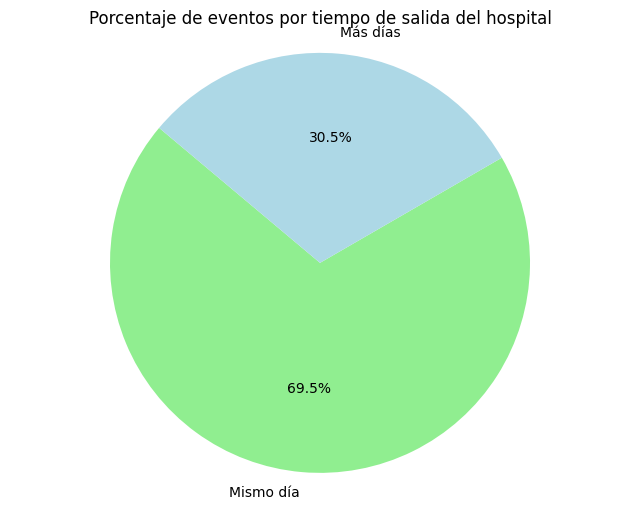

In [78]:

mismo_dia = diferencia_fechas.dt.days == 0

# Contar la cantidad de eventos que ocurrieron en el mismo día y aquellos que tardaron más días
cantidad_mismo_dia = mismo_dia.sum()
cantidad_mas_dias = (~mismo_dia).sum()

# Calcular los porcentajes
total_eventos = len(df_victimas)
porcentaje_mismo_dia = (cantidad_mismo_dia / total_eventos) * 100
porcentaje_mas_dias = (cantidad_mas_dias / total_eventos) * 100

# Crear un gráfico de torta
labels = ['Mismo día', 'Más días']
sizes = [porcentaje_mismo_dia, porcentaje_mas_dias]
colors = ['lightgreen', 'lightblue']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de eventos por tiempo de salida del hospital')
plt.axis('equal')
plt.show()


ROL?ROL	Posición relativa al vehículo que presentaba la víctima en el momento del siniestro				

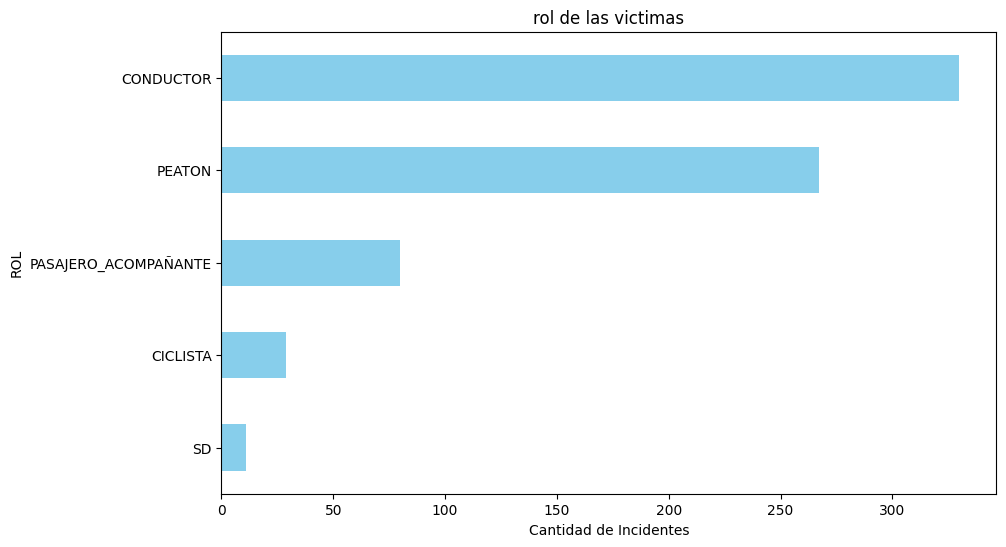

In [84]:

cruces_frecuentes = df_victimas['ROL'].value_counts().head(10)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
cruces_frecuentes.plot(kind='barh', color='skyblue')
plt.title('rol de las victimas')
plt.xlabel('Cantidad de Incidentes')
plt.ylabel
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el más frecuente arriba
plt.show()

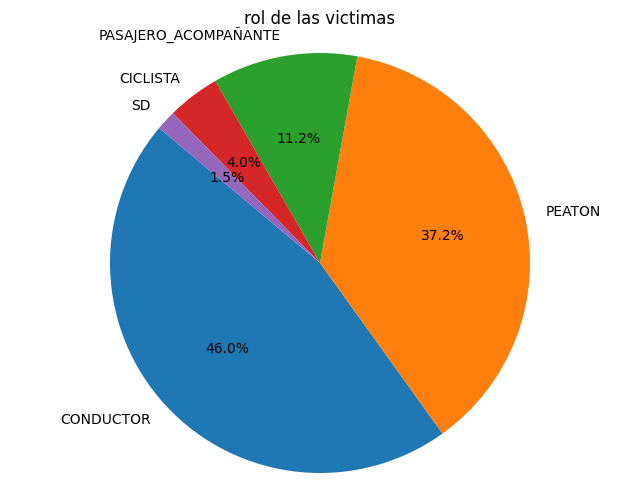

In [82]:
conteo_tipos_calle = df_victimas['ROL'].value_counts()

# Preparar datos para el gráfico de torta
labels = conteo_tipos_calle.index
sizes = conteo_tipos_calle.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('rol de las victimas')
plt.axis('equal')
plt.show()

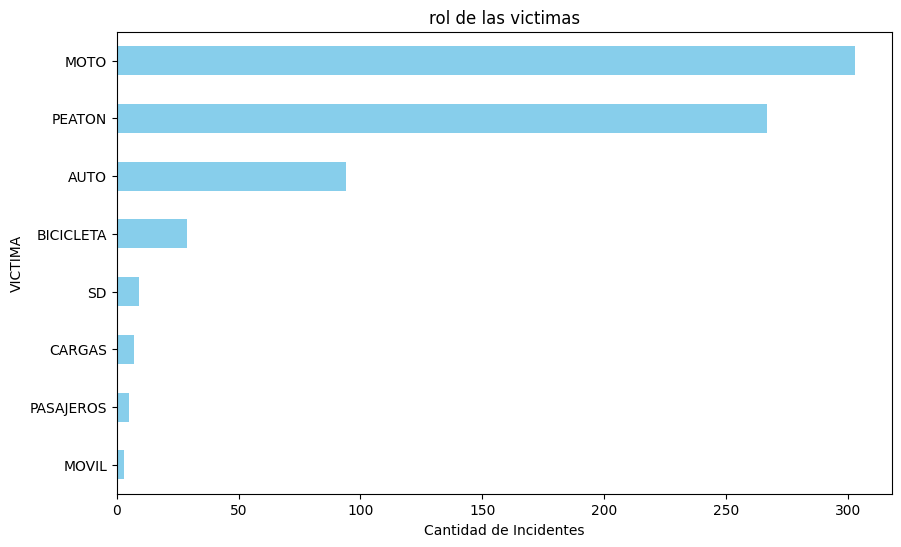

In [85]:

cruces_frecuentes = df_victimas['VICTIMA'].value_counts().head(10)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 6))
cruces_frecuentes.plot(kind='barh', color='skyblue')
plt.title('rol de las victimas')
plt.xlabel('Cantidad de Incidentes')
plt.ylabel
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el más frecuente arriba
plt.show()